## Table of Contents
- Introduction to Random Forest algorithm
- Random Forest algorithm intuition
- Advantages and disadvantages of Random Forest algorithm
- Feature selection with Random Forests
- Difference between Random Forests and Decision-Trees
- Relationship to nearest neighbours
- Import libraries
- Import dataset
- Exploratory data analysis
- Declare feature vector and target variable
- Split data into separate training and test set
- Feature engineering
- Random Forest Classifier model with default parameters
- Random Forest Classifier model with parameter n_estimators=100
- Find important features with Random Forest model
- Visualize the feature scores of the features
- Build the Random Forest model on selected features
- Confusion matrix
- Classification report
- Results and conclusion
- References

## Introduction To Random Forest Classifier Algorithm

Random Forest is a supervised learning algorithm. It has two variations - one is used for classification problems and other is used for Regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random Forest algorithm combines multiple decision trees, resulting in a forest of trees, hence the name Random Forest. In the Random Forest Algorithm, higher the number of trees, better the accuracy will be.

## Random Forest Algorithm Intuition

Random Forest algorithm intuition can be divided into two categories.

In the first stage, we randomly select "k" features out of all total "m" features and build the random forest. In the first stage, we proceed as follows :-
   1. Randomly select k features from total of m features.
   2. Among the k features, calculate the node d using the best split point.
   3. Split the node into child nodes using the best split.
   4. Repeat steps 1 to 3 until the 1 number of nodes has been reached.
   5. Build a Forest by repeating steps 1 to 4  for n number of times to create n number of decision trees.

In the second stage, we make predictions using the trained random forest algorithm.
   1. We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the prediction outcome.
   2. Then, we calculate the votes for each predicted target.
   3. Finally, we consider the high voted predcited target as the final prediction from Random Forest Algorithm.
    
    

## Advantages and Disadvantages of Random Forest Algorithm

The advantages of Random Forest Algorithm as follows :-

   1. Random Forest Algorithm can be used to solve both classification and regression problems.
   2. It is considered as very accurate and robust model because it uses large number of decision trees to make       predictions.  
   3. Random Forest takes the average of all predictions made by the decision trees, which cancels out the biases. So, it doesn't suffer from the overfitting problem.
   4. Random Forest classifier can handle the missing values. There are two ways to handle the missing values.
        - First is to use median values to replace continuous variables and 
        - Second is to compute the proximity - weighted average of missing values.
   5. Random Forest clasifier can be used for feature selection. It means selecting most important features out of all the available features from the training set.
    
    
The disadvantages of Random Forest algorithm is listed below :-

   1. The biggest disadvantage of random forest is its computational complexity. Random forest is very slow in making     predictions because large number of decision trees are used to make predictions. 
   2. The model is difficult to interpret as cpmpared to a decision tree.
    
    

## Feature Selection With Random Forest

Random Forest Algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem. 

We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the output of bag error for each data point is recorded and averaged over the forest.

The imporatnce of j-th feature is measured after training. The values of the j-th feature are permuted among the training data and the out-of- bag error is again calulated on this permuted dataset. The importance score for j-th feature is computed by averaging the difference in out-of-bag error before andf after permuted over the trees. The score is normalized by std. deviation of these differences.


Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building.


## Difference between Random Forest and Decision Trees.

I will compare random forests with decision-trees. Some salient features of comparison are as follows:-

- Random forests is a set of multiple decision-trees.

- Decision-trees are computationally faster as compared to random forests.

- Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

- Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

## Relationship to nearest neighbors
A relationship between random forests and the k-nearest neighbours algorithm was pointed out by Lin and Jeon in 2002. It turns out that both can be viewed as so-called weighted neighbourhoods schemes. These are models built from a training set that make predictions for new points by looking at the neighbourhood of the point, formalized by a weight function.

In [1]:
import numpy as np  # Linear Algebra
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt  # Data Visulaization
import seaborn as sns # Statistical Data Visualization
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')


## Import Dataset

In [2]:
df = pd.read_csv("F:\Prashant Kaggle\Deciosion Tree Classifier\car_evaluation.csv", header = None)
df.head()

0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc

## Exploratory Data Analysis

Now, I will explore the data to gain insights about the data

In [3]:
# View dimensions of dataset
print("Dimensions of the dataset: ", df.shape)

Dimensions of the dataset:  (1728, 7)


We can see that there are 1728 instances and 7 attributes in the dataset.

## Rename Column names
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [4]:
col_names = ['buying', 'maint','doors', 'persons', 'lug_boot', 'saftey', 'class']

df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'saftey', 'class']

In [5]:
df.head()

buying  maint doors persons lug_boot saftey  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

## View Summary of The Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   saftey    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Frequency Distribution of Values in Attributes
Now, I will check the frequency counts of categorical values.

In [7]:
col_names = ['buying', 'maint','doors', 'persons', 'lug_boot', 'saftey', 'class']

for col in col_names :
    print(df[col].value_counts(), "\n\n")

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64 


vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64 


2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 


2       576
4       576
more    576
Name: persons, dtype: int64 


small    576
med      576
big      576
Name: lug_boot, dtype: int64 


low     576
med     576
high    576
Name: saftey, dtype: int64 


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 




We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

## Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.

These are given by buying, maint, doors, persons, lug_boot, safety and class.

class is the target variable.

## Explore Class Variable


In [8]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The class target variable is ordinal in nature.

## Check missing values in the dataset

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
saftey      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

## Declare Feature Vector and Target Variable

In [10]:
X = df.drop(['class'], axis = 1)
y = df['class']

## Split the data into traning and testing sets

In [11]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

## Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carryout feature engineering on different types of variables. 

First, let's check the data types of the variables.

In [12]:
# check the data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
saftey      object
dtype: object

In [13]:
X_train.head()

buying  maint  doors persons lug_boot saftey
48    vhigh  vhigh      3    more      med    low
468    high  vhigh      3       4    small    low
155   vhigh   high      3    more    small   high
1721    low    low  5more    more    small   high
1208    med    low      2    more    small   high

We can see that all the variables are ordinal categorical data type.

In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

oe_buying = OrdinalEncoder(categories = [['low','med','high','vhigh']],dtype =int)
oe_maint = OrdinalEncoder(categories= [['low','med','high','vhigh']], dtype= int)
oe_doors = OrdinalEncoder(categories= [[ '2', '4','3', '5more',]], dtype= int)
oe_person = OrdinalEncoder(categories=[['2','4','more']], dtype = int)
oe_lugboot =OrdinalEncoder(categories= [['small','med','big']], dtype =int)
oe_safty =OrdinalEncoder(categories= [['low','med','high']], dtype= int)



col_trf = ColumnTransformer([
    ('oe_buying', oe_buying, ['buying']),
    ('oe_maint', oe_maint, ['maint']),
    ('oe_doors',oe_doors,['doors']),
    ('oe_persons',oe_person,['persons']),
    ('oe_lugboot', oe_lugboot, ['lug_boot']),
    ('oe_safty', oe_safty, ['saftey'])    
],remainder='passthrough')


X_train = pd.DataFrame(col_trf.fit_transform(X_train),columns= [str(col).split("__")[1] for col in col_trf.get_feature_names_out().tolist()])
X_test =pd.DataFrame(col_trf.transform(X_test),columns= [str(col).split("__")[1] for col in col_trf.get_feature_names_out().tolist()])

We now have train and test ready for modeling.

## Random Forest Classifier model with default parameters


In [19]:
# import Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state= 0)

# fit the model 
rfc.fit(X_train, y_train)

# Predict the test set results
y_pred = rfc.predict(X_test)

# Check accuarcy score

from sklearn.metrics import accuracy_score

print("Model accuarcy score with 100 decision trees : {0:0.4f}".format(accuracy_score(y_test, y_pred)))


Model accuarcy score with 100 decision trees : 0.9615


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 100. So, I have used 100 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## Find important features with Random Forest Model

Until now, I have used all the features given in the model. Now, I will select only important features, build the model on top of it see its effect on accuracy.

First, I will create the Random Forest Model as follows:-
    


In [22]:
# Create the classifier with n_estimators =100

clf = RandomForestClassifier(n_estimators=100,random_state= 0)

# fir the model to training set
clf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance method to see feature importance scores.

In [30]:
# View Feature Scores
feature_scores = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending= False)
print("Scores of features in Percentage are listed below : \n")
feature_scores*100

Scores of features in Percentage are listed below : 



saftey      29.737360
persons     23.794192
buying      16.082655
maint       14.947445
lug_boot     8.801541
doors        6.636806
dtype: float64

We can see that the most important feature is safety and least important feature is doors.

## Visualize feature scores of features

Now, I will visualize the feature score with matplotlib and seaborn


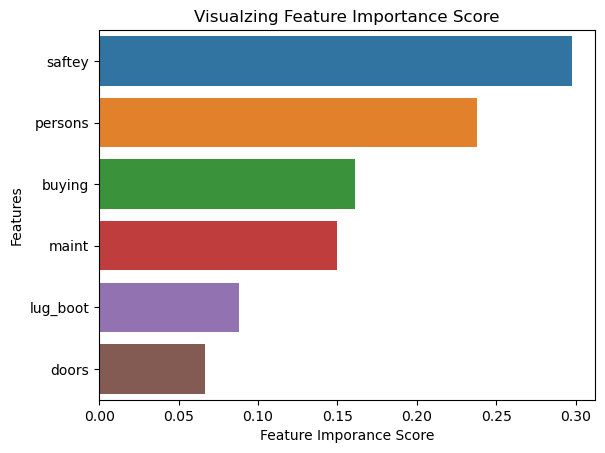

In [41]:
# Creating a seaborn bar plot
sns.barplot(x = feature_scores, y = feature_scores.index)

# Add labels to the graph
plt.xlabel("Feature Imporance Score")
plt.ylabel("Features")

#Add title to the graph
plt.title("Visualzing Feature Importance Score")

# Visualize the graph
plt.show()

## Build Random Forest Model on sElected Features
Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [42]:
# declare the feature vector and target variable
X = df.drop(columns= ["class", "doors"],axis = 1)
y =df['class']

In [43]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.33)

Now, I will build the random forest model and check accuracy

## Ordinal Encoding of Categorical Variables

In [46]:

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

oe_buying = OrdinalEncoder(categories = [['low','med','high','vhigh']],dtype =int)
oe_maint = OrdinalEncoder(categories= [['low','med','high','vhigh']], dtype= int)
# oe_doors = OrdinalEncoder(categories= [[ '2', '4','3', '5more',]], dtype= int)  # removed as per the feature score
oe_person = OrdinalEncoder(categories=[['2','4','more']], dtype = int)
oe_lugboot =OrdinalEncoder(categories= [['small','med','big']], dtype =int)
oe_safty =OrdinalEncoder(categories= [['low','med','high']], dtype= int)



col_trf = ColumnTransformer([
    ('oe_buying', oe_buying, ['buying']),
    ('oe_maint', oe_maint, ['maint']),
    ('oe_persons',oe_person,['persons']),
    ('oe_lugboot', oe_lugboot, ['lug_boot']),
    ('oe_safty', oe_safty, ['saftey'])    
],remainder='passthrough')


X_train = pd.DataFrame(col_trf.fit_transform(X_train),columns= [str(col).split("__")[1] for col in col_trf.get_feature_names_out().tolist()])
X_test =pd.DataFrame(col_trf.transform(X_test),columns= [str(col).split("__")[1] for col in col_trf.get_feature_names_out().tolist()])

In [47]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the training set
clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9299


I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with doors variable removed from the model.

Furthermore, the second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

## Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

<Axes: >

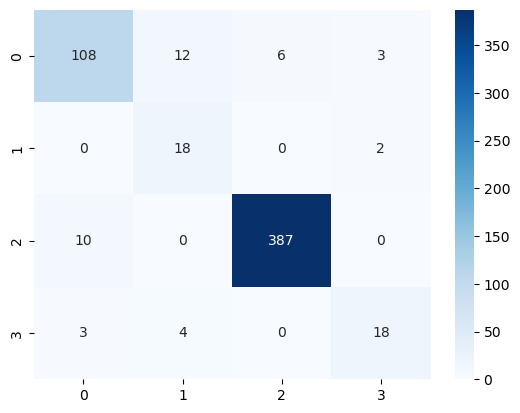

In [59]:
# Print Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

confusion_matrix_df = pd.DataFrame(cm)
sns.heatmap(confusion_matrix_df,annot= True, cmap = 'Blues',fmt ="d")

## Classification Report 

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         acc       0.89      0.84      0.86       129
        good       0.53      0.90      0.67        20
       unacc       0.98      0.97      0.98       397
       vgood       0.78      0.72      0.75        25

    accuracy                           0.93       571
   macro avg       0.80      0.86      0.82       571
weighted avg       0.94      0.93      0.93       571



##  Results and conclusion 
- In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees.

- The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.

- I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.

- I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with doors variable removed from the model.

- The second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

- Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.